In [1]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv("data/DisneylandReviews.csv", encoding="ISO-8859-1")

In [22]:
# Safely convert to datetime, invalid entries become NaT
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m', errors='coerce')

# Drop rows with missing dates if they’re rare
df = df.dropna(subset=['Year_Month'])

# Extract month + season
df['Month'] = df['Year_Month'].dt.month

season_map = {
    12:'Winter', 1:'Winter', 2:'Winter',
    3:'Spring', 4:'Spring', 5:'Spring',
    6:'Summer', 7:'Summer', 8:'Summer',
    9:'Fall', 10:'Fall', 11:'Fall'
}
df['Season'] = df['Month'].map(season_map)

C:\Users\dorgo\AppData\Local\Temp\ipykernel_8532\727873783.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorgo\AppData\Local\Temp\ipykernel_8532\727873783.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
print(df.info())
print(df.nunique())
print(df['Branch'].value_counts())
print(df['Reviewer_Location'].value_counts().head(20))

<class 'pandas.core.frame.DataFrame'>
Index: 40043 entries, 0 to 42117
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_ID          40043 non-null  int64         
 1   Rating             40043 non-null  int64         
 2   Year_Month         40043 non-null  datetime64[ns]
 3   Reviewer_Location  40043 non-null  object        
 4   Review_Text        40043 non-null  object        
 5   Branch             40043 non-null  object        
 6   Month              40043 non-null  int32         
 7   Season             40043 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 2.6+ MB
None
Review_ID            40023
Rating                   5
Year_Month             111
Reviewer_Location      162
Review_Text          40022
Branch                   3
Month                   12
Season                   4
dtype: int64
Branch
Disneyland_California    18

In [25]:
fig = px.histogram(
    df,
    x="Branch",
    color="Rating",
    barmode="group",
    histnorm="percent",
    category_orders={"Rating":[1,2,3,4,5]},
    title="Rating Distribution by Park (Side-by-Side)"
)

fig.update_layout(
    xaxis_title="Park",
    yaxis_title="Percentage of Reviews",
    legend_title="Rating (Stars)"
)

fig.show()


In [26]:
kpis = (
    df.assign(is_pos = df['Rating'] >= 4)
      .groupby('Branch')
      .agg(avg_rating=('Rating', 'mean'),
           pos_share = ('is_pos', 'mean'),
           n=('Rating', 'size'))
      .assign(pos_share=lambda x: 100*x['pos_share'])
      .reset_index()
)
kpis


,Branch,avg_rating,pos_share,n
0,Disneyland_California,4.413691,85.237886,18202
1,Disneyland_HongKong,4.215480,80.802449,9147
2,Disneyland_Paris,3.980542,71.592879,12694


In [27]:
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')
df['Month'] = df['Year_Month'].dt.month
season_map = {12:'Winter',1:'Winter',2:'Winter', 3:'Spring',4:'Spring',5:'Spring',
              6:'Summer',7:'Summer',8:'Summer', 9:'Fall',10:'Fall',11:'Fall'}
df['Season'] = df['Month'].map(season_map)

season_kpis = (
    df.assign(is_pos = df['Rating'] >= 4)
      .groupby(['Branch','Season'])
      .agg(avg_rating=('Rating','mean'),
           pos_share=('is_pos','mean'),
           n=('Rating','size'))
      .assign(pos_share=lambda x: 100*x['pos_share'])
      .reset_index()
)
season_kpis


C:\Users\dorgo\AppData\Local\Temp\ipykernel_8532\172532373.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorgo\AppData\Local\Temp\ipykernel_8532\172532373.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorgo\AppData\Local\Temp\ipykernel_8532\172532373.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Branch,Season,avg_rating,pos_share,n
0,Disneyland_California,Fall,4.451174,86.284837,4557
1,Disneyland_California,Spring,4.377916,84.381249,4501
2,Disneyland_California,Summer,4.445131,86.302164,5176
3,Disneyland_California,Winter,4.370212,83.618952,3968
4,Disneyland_HongKong,Fall,4.246408,82.890727,2297
5,Disneyland_HongKong,Spring,4.262563,82.579564,2388
6,Disneyland_HongKong,Summer,4.106455,76.348748,2076
7,Disneyland_HongKong,Winter,4.233445,80.888516,2386
8,Disneyland_Paris,Fall,4.113274,75.504425,2825
9,Disneyland_Paris,Spring,3.951613,70.524984,3162


C:\Users\dorgo\AppData\Local\Temp\ipykernel_8532\1540281468.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



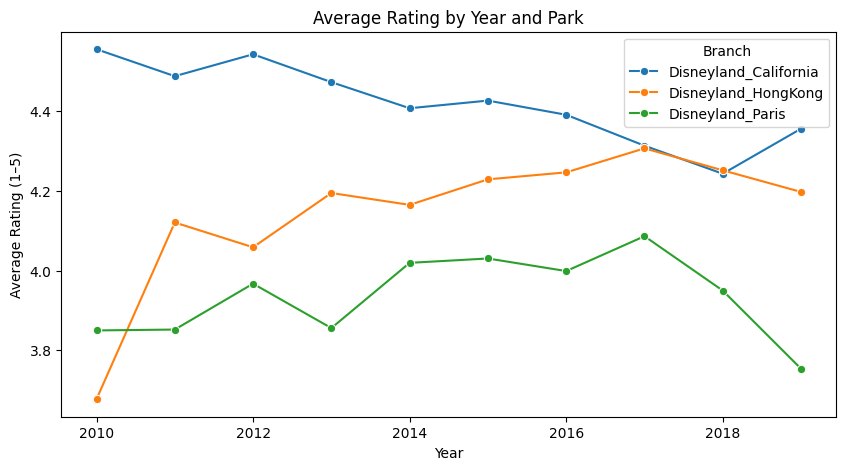

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Year'] = df['Year_Month'].dt.year

trend = (
    df.groupby(['Branch','Year'])['Rating']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='Year', y='Rating', hue='Branch', marker='o')
plt.title("Average Rating by Year and Park")
plt.ylabel("Average Rating (1–5)")
plt.show()


In [29]:
var = (
    df.groupby('Branch')['Rating']
      .agg(['mean','std','count'])
      .rename(columns={'mean':'avg_rating','std':'std_dev','count':'n'})
      .reset_index()
)
var

,Branch,avg_rating,std_dev,n
0,Disneyland_California,4.413691,0.967266,18202
1,Disneyland_HongKong,4.215480,0.923861,9147
2,Disneyland_Paris,3.980542,1.193096,12694


In [30]:
top_countries = df['Reviewer_Location'].value_counts().head(10).index

mix = (
    df[df['Reviewer_Location'].isin(top_countries)]
      .groupby(['Branch','Reviewer_Location'])
      .size()
      .reset_index(name='n')
)

fig = px.bar(
    mix,
    x="Branch", y="n", color="Reviewer_Location",
    title="Top 10 Reviewer Countries per Park",
    barmode="stack"
)
fig.show()

In [31]:
import plotly.express as px

season_heat = (
    df.groupby(['Branch','Season'])['Rating']
      .mean()
      .reset_index()
)

fig = px.density_heatmap(
    season_heat,
    x="Season", y="Branch", z="Rating",
    color_continuous_scale="RdYlGn",  # red = low, green = high
    text_auto=".2f",
    title="Average Rating by Park and Season"
)

fig.update_layout(
    xaxis_title="Season",
    yaxis_title="Park",
    coloraxis_colorbar_title="Avg Rating"
)
fig.show()


In [32]:
top_countries = df['Reviewer_Location'].value_counts().head(10).index

country_scores = (
    df[df['Reviewer_Location'].isin(top_countries)]
      .groupby(['Reviewer_Location','Branch'])['Rating']
      .mean()
      .reset_index()
)

fig = px.bar(
    country_scores,
    x="Reviewer_Location", y="Rating",
    color="Branch",
    barmode="group",
    category_orders={"Reviewer_Location": top_countries},
    title="Average Rating by Reviewer Country (Top 10)"
)

fig.update_layout(
    xaxis_title="Reviewer Country",
    yaxis_title="Average Rating (1–5)",
    legend_title="Park"
)
fig.show()
